# Import necessary library from BioPython

In [2]:
from Bio import Phylo, AlignIO, SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import ParsimonyScorer, NNITreeSearcher, ParsimonyTreeConstructor

Convert the sequence into 1 fasta file for analyze

In [3]:
list_fasta = list(SeqIO.parse("/home/vannguyen/project/IntroductionToBioinformatics/Final_Part1/ex4.fasta", "fasta"))
print(list_fasta)

[SeqRecord(seq=Seq('MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGSPQPPPPRFKR...VTV'), id='XP_055116566.2', name='XP_055116566.2', description='XP_055116566.2 centrosomal protein of 97 kDa isoform X1 [Symphalangus syndactylus]', dbxrefs=[]), SeqRecord(seq=Seq('MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGSPQPPPPRFKR...VTV'), id='XP_055116567.2', name='XP_055116567.2', description='XP_055116567.2 centrosomal protein of 97 kDa isoform X2 [Symphalangus syndactylus]', dbxrefs=[]), SeqRecord(seq=Seq('MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGSPQPPPPRFKR...PPE'), id='XP_063486045.1', name='XP_063486045.1', description='XP_063486045.1 centrosomal protein of 97 kDa isoform X5 [Symphalangus syndactylus]', dbxrefs=[]), SeqRecord(seq=Seq('MGSHYIAQAGLELLTSSSLHQSPKACSGTISAHCNLHPSGSSNSPASASQVAGV...LAS'), id='KAL0625288.1', name='KAL0625288.1', description='KAL0625288.1 Protein GVQW1 [Plecturocebus cupreus]', dbxrefs=[]), SeqRecord(seq=Seq('MSLVDLGKRLLEAARKGQDDEVRTLMANGAPFTTDWLGTSPLHLAAQYGHYSTA...YCL'), 

Read the aligment result and print out the sequence information

In [4]:
with open("/home/vannguyen/project/IntroductionToBioinformatics/Final_Part1/clustalw.aln","r") as aln:
	alignment = AlignIO.read(aln,"clustal")

print(alignment)
print(type(alignment))


Alignment with 10 rows and 1005 columns
------------------MSLVDLGKRLLEAARKGQDDEVRTLM...--- XP_050606161.1
------------------MSLVDLGKRLLEAARKGQDDEVRTLM...--- XP_050606147.1
------------------MSLVDLGKRLLEAARKGQDDEVRTLM...--- XP_065402273.1
------------------MSLVDLGKRLLEAARKGQDDEVRTLM...--- XP_050606154.1
------------------MSLVDLGKRLLEAARKGQDDEVRTLM...--- XP_065402271.1
MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGS...VTV XP_055116566.2
MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGS...VTV XP_055116567.2
MPKRQSDSWFMSHSVSLSLSLFFFLRRNFALVAQARVQWRDLGS...--- XP_063486045.1
---------------MQIIFFFLFLRWSFTLVAQAGVQWRDLSS...--- AAG35515.1
---MGSHYIAQAGLELLTSSSLHQSPKACSGTISAHCNLHPSGS...--- KAL0625288.1
<class 'Bio.Align.MultipleSeqAlignment'>


# Building Tree using Distance Matrix method: Neighbour Joining (NJ)

In [5]:
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

XP_050606161.1  0.000000
XP_050606147.1  0.037811    0.000000
XP_065402273.1  0.004975    0.042786    0.000000
XP_050606154.1  0.017910    0.055721    0.022886    0.000000
XP_065402271.1  0.022886    0.060697    0.017910    0.004975    0.000000
XP_055116566.2  0.953234    0.949254    0.953234    0.951244    0.951244    0.000000
XP_055116567.2  0.894527    0.890547    0.894527    0.892537    0.892537    0.058706    0.000000
XP_063486045.1  0.753234    0.749254    0.753234    0.751244    0.751244    0.230846    0.289552    0.000000
AAG35515.1  0.510448    0.548259    0.514428    0.507463    0.511443    0.920398    0.861692    0.720398    0.000000
KAL0625288.1    0.501493    0.523383    0.501493    0.515423    0.515423    0.910448    0.851741    0.710448    0.417910    0.000000
    XP_050606161.1  XP_050606147.1  XP_065402273.1  XP_050606154.1  XP_065402271.1  XP_055116566.2  XP_055116567.2  XP_063486045.1  AAG35515.1  KAL0625288.1


In [6]:
constructor = DistanceTreeConstructor(calculator,'nj')
tree = constructor.build_tree(alignment)
print(tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.0027985074626865752, name='Inner7')
            Clade(branch_length=0.0032338308457711268, name='XP_065402273.1')
            Clade(branch_length=0.0017412935323383033, name='XP_050606161.1')
        Clade(branch_length=0.008644278606965164, name='Inner6')
            Clade(branch_length=0.25576285240464336, name='Inner4')
                Clade(branch_length=0.030398009950248717, name='Inner3')
                    Clade(branch_length=0.20522388059701496, name='KAL0625288.1')
                    Clade(branch_length=0.21268656716417905, name='AAG35515.1')
                Clade(branch_length=0.43129353233830847, name='Inner2')
                    Clade(branch_length=0.044776119402984926, name='XP_063486045.1')
                    Clade(branch_length=0.1860696517412937, name='Inner1')
                        Clade(branch_length=0.00733830845771144, name='XP_055116567.2')
                        Clade

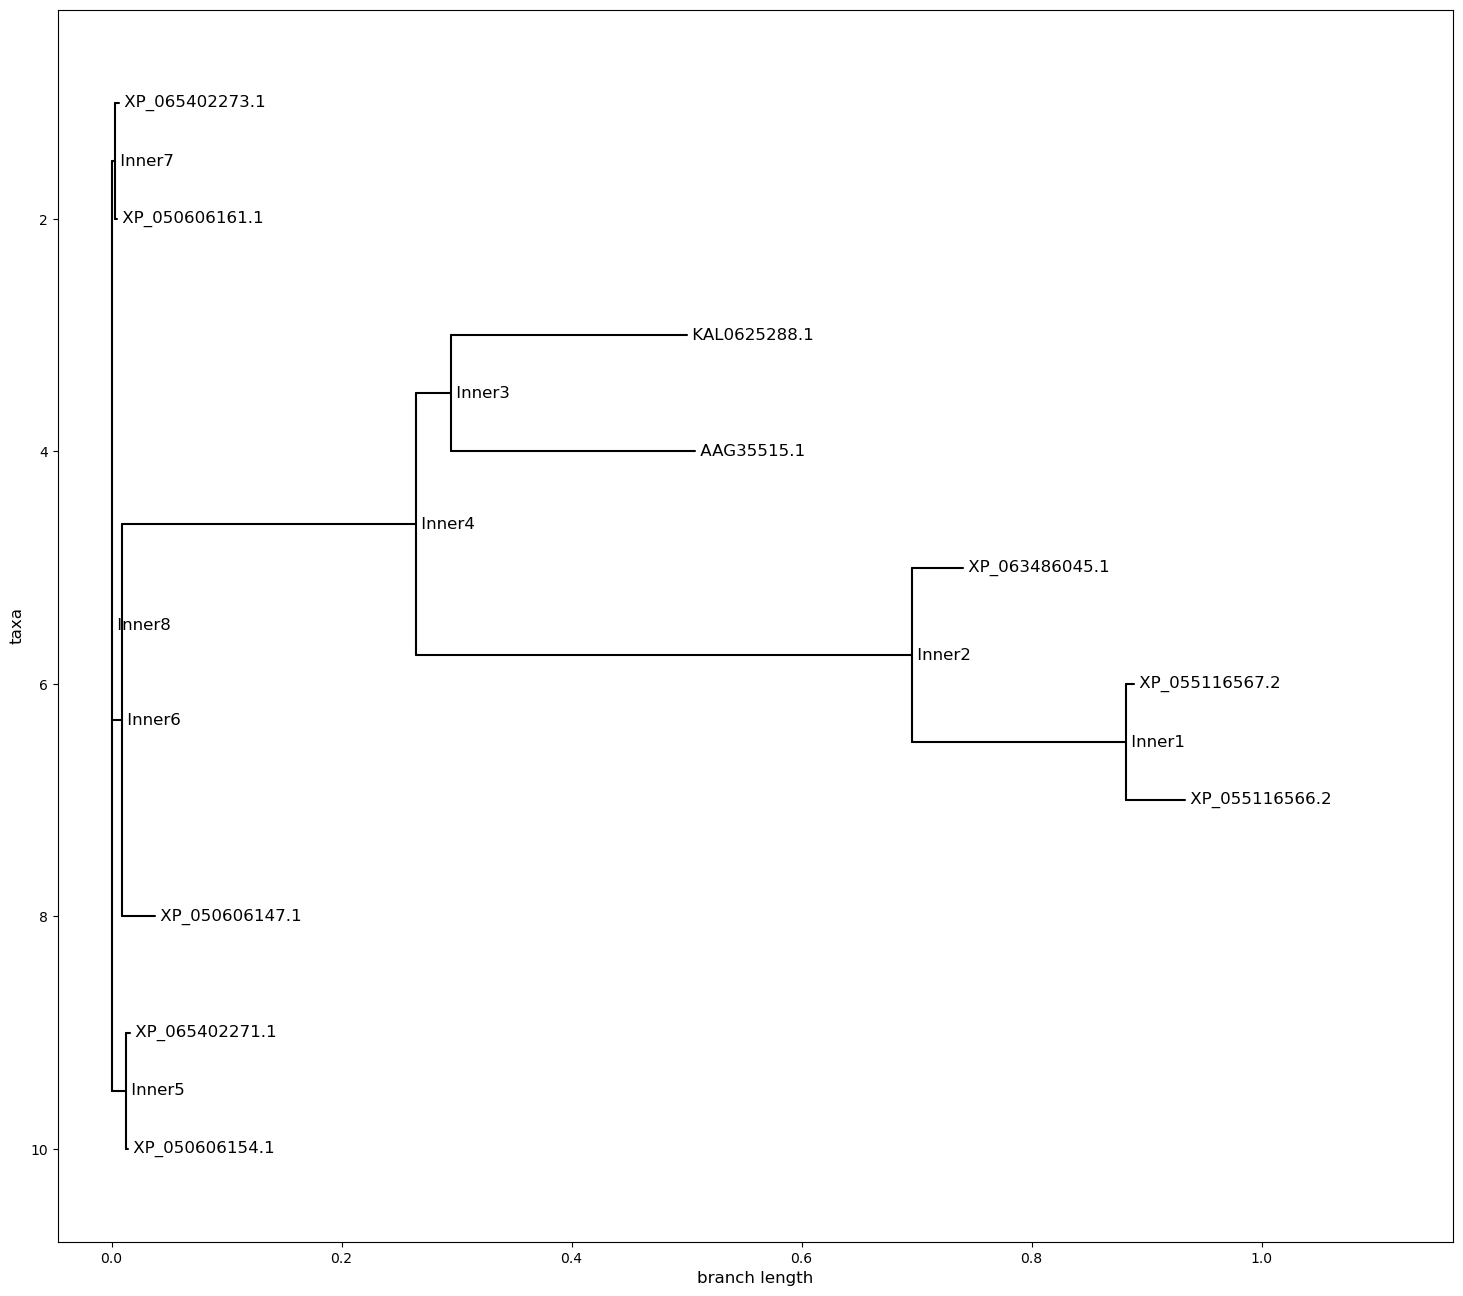

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)             # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels

# Bold and red the name='XP_065402273.1'
axes = fig.add_subplot(1, 1, 1)

Phylo.draw(tree, axes=axes)


# Building Tree using Character-based method: Maximum Parsimony

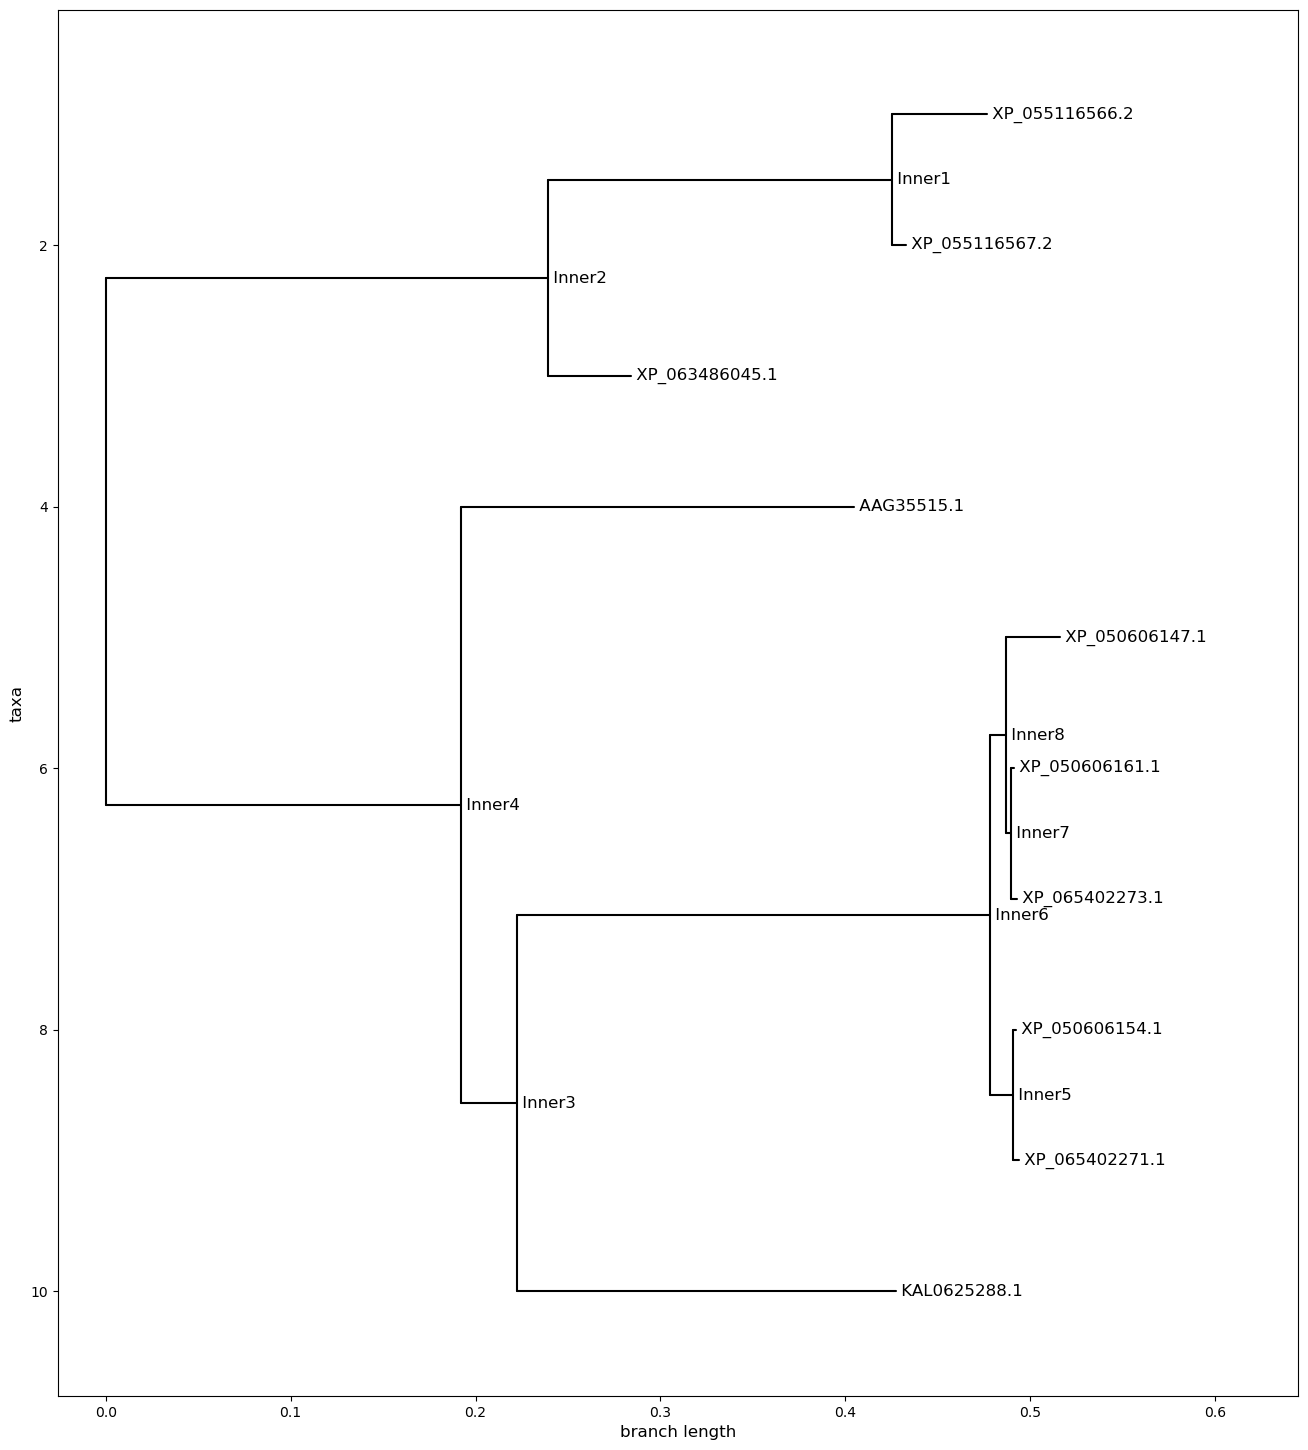

In [8]:
MP_score = ParsimonyScorer()
searcher = NNITreeSearcher(MP_score)
parsimony_constructor = ParsimonyTreeConstructor(searcher, tree)
parsimony_tree = parsimony_constructor.build_tree(alignment)
# Print and visualize the tree
fig = plt.figure(figsize=(16, 18), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)             # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(parsimony_tree, axes=axes)